In [ ]:
from trainModel import CatchEnvironment, X, W1, b1, input_layer, W2, b2, hidden_layer, W3, b3, output_layer, Y, cost, optimizer
from IPython import display
import pylab as pl
import time
import tensorflow as tf
import math
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib
%matplotlib inline

Using matplotlib backend: TkAgg


INFO:tensorflow:Restoring parameters from C:\Users\kissi\PycharmProjects\QLearningForCatchGame\model\model.ckpt


saved model is loaded!


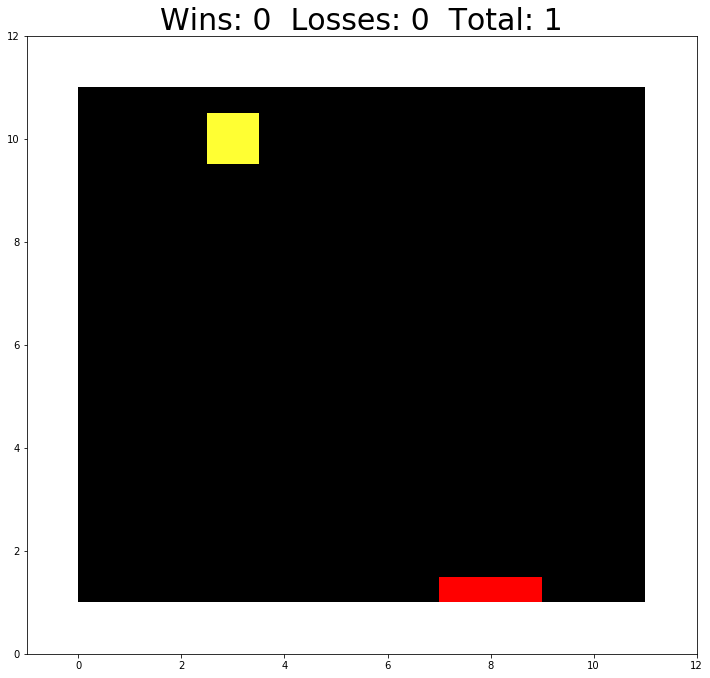

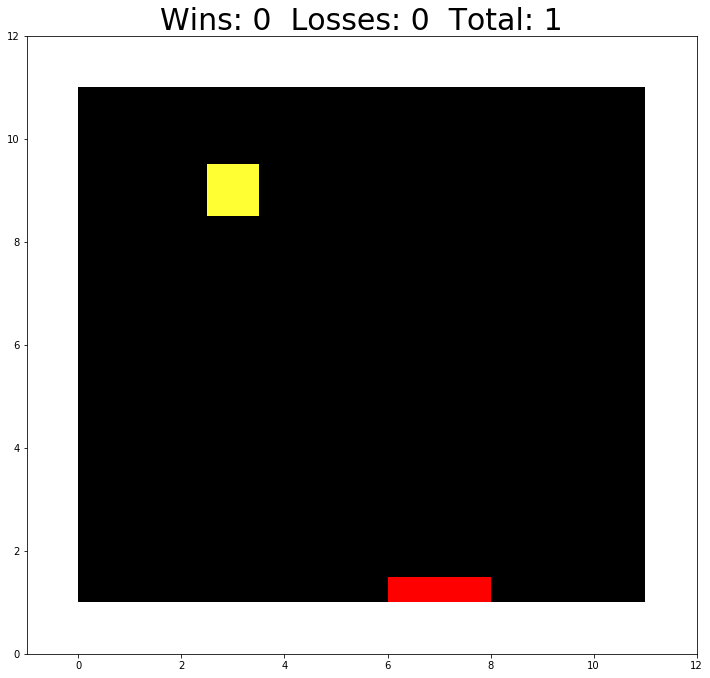

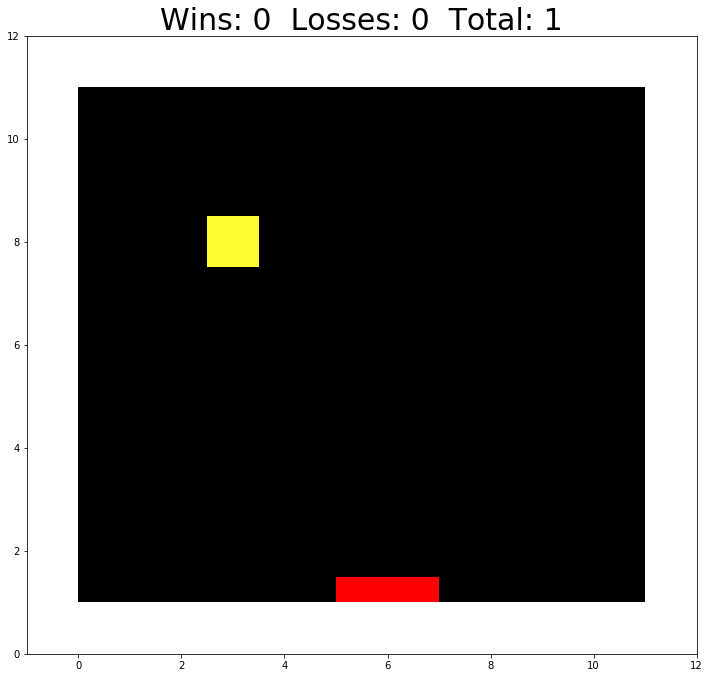

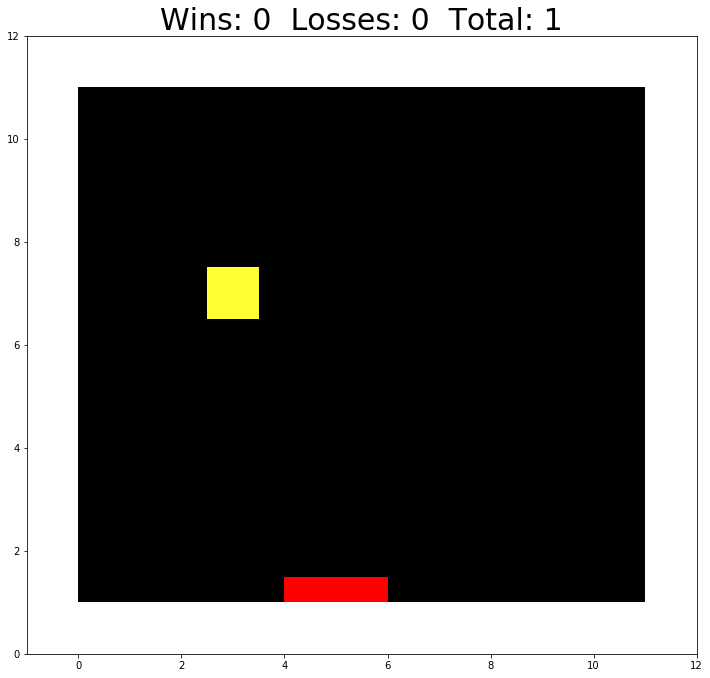

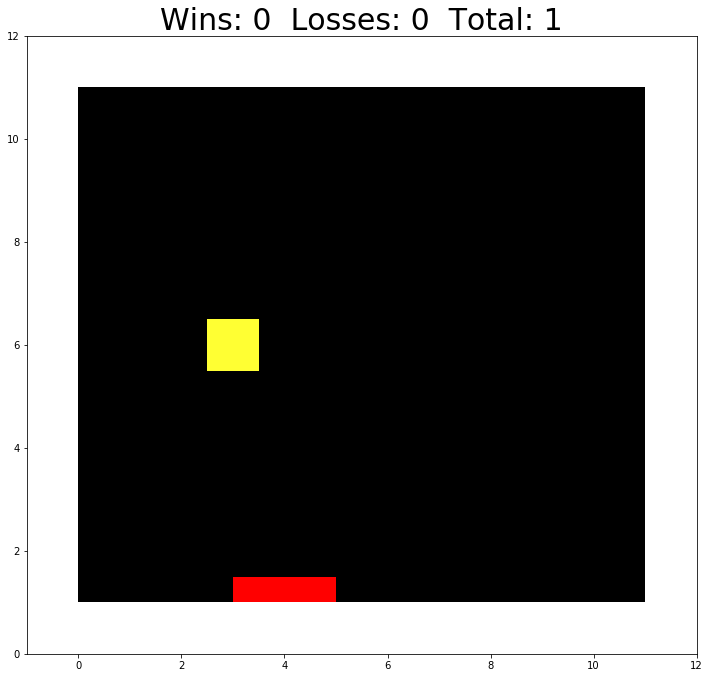

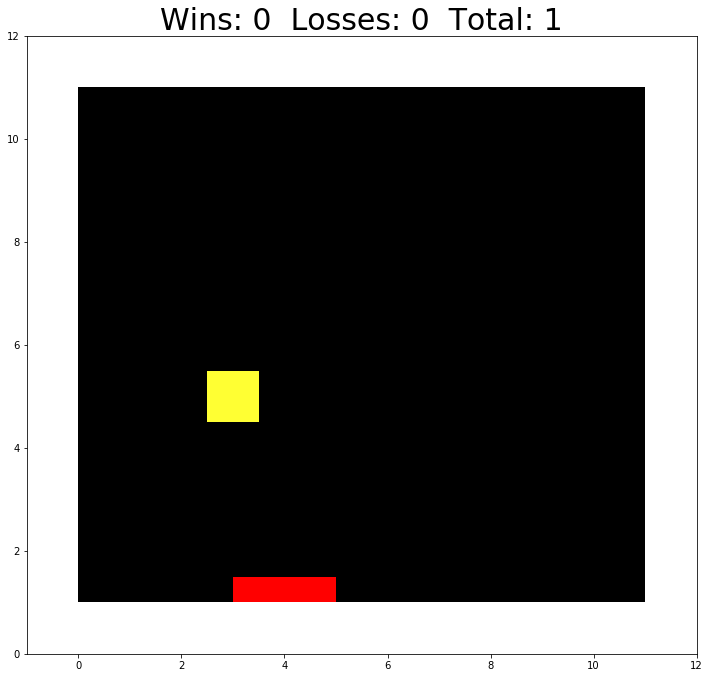

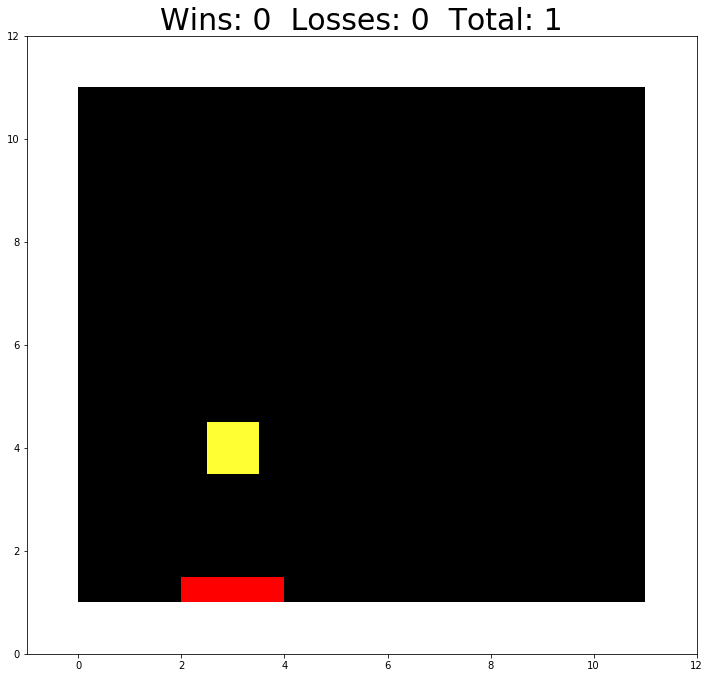

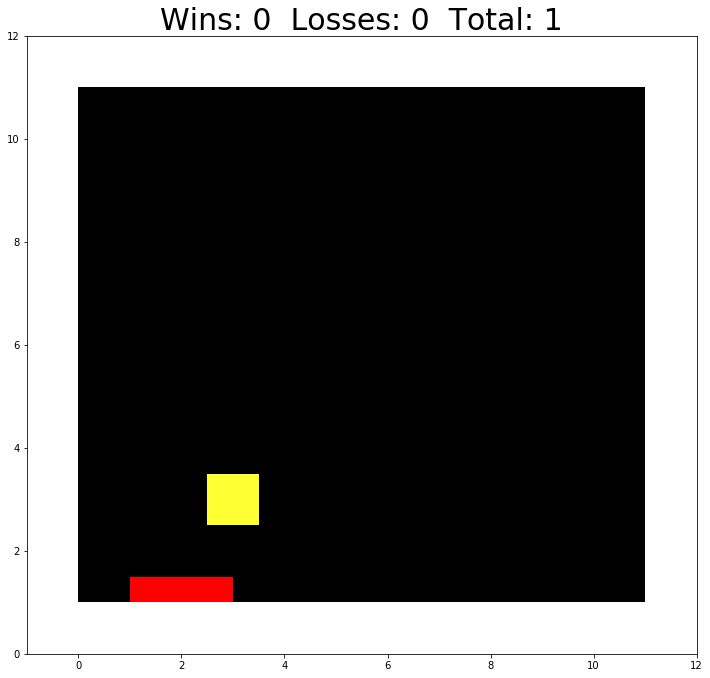

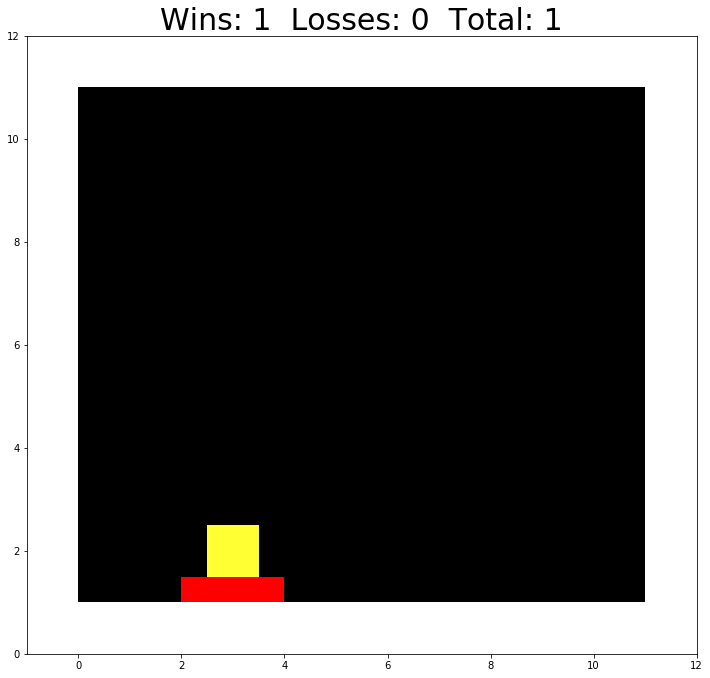

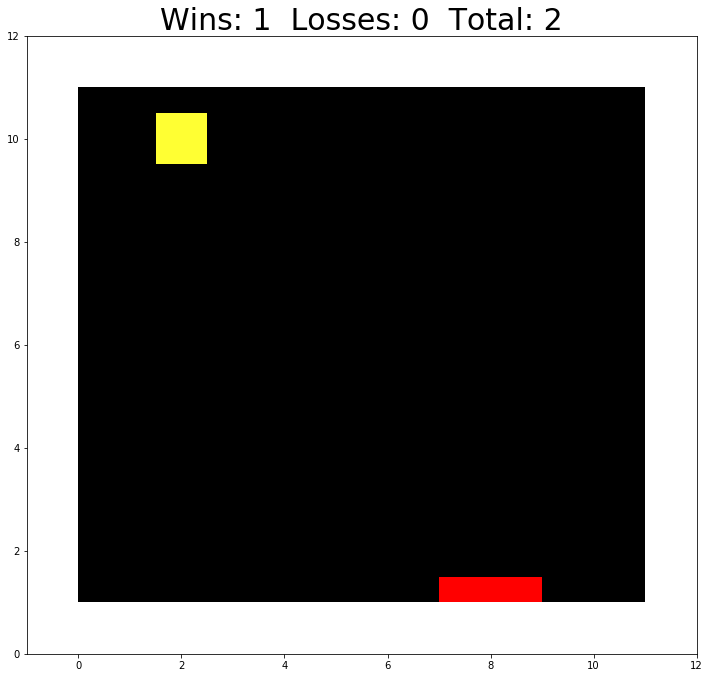

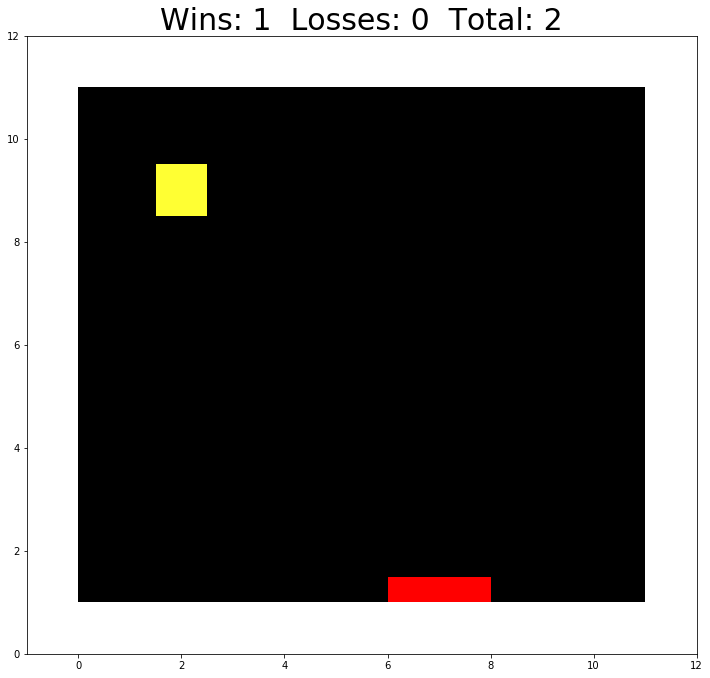

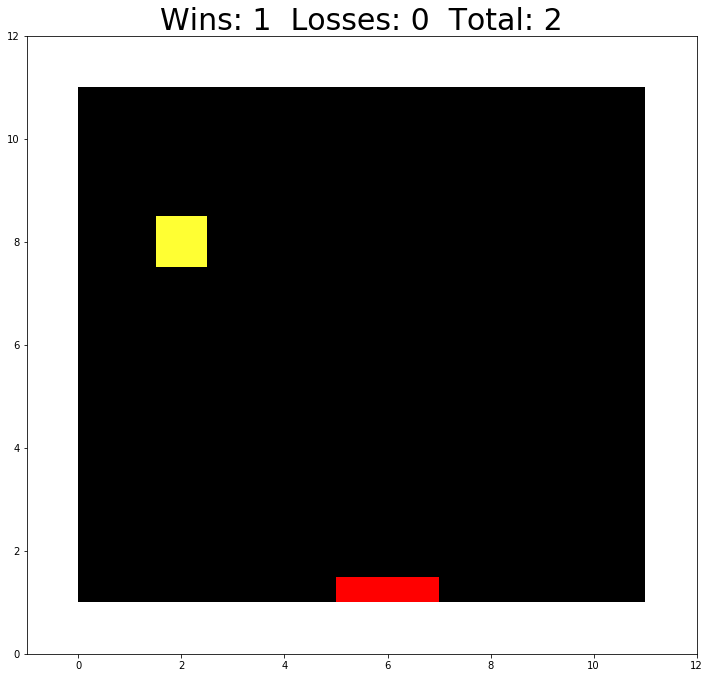

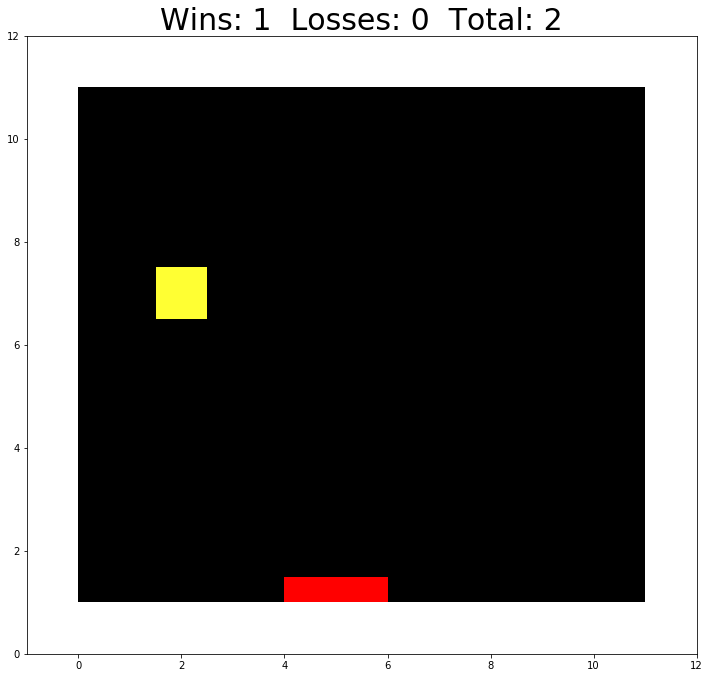

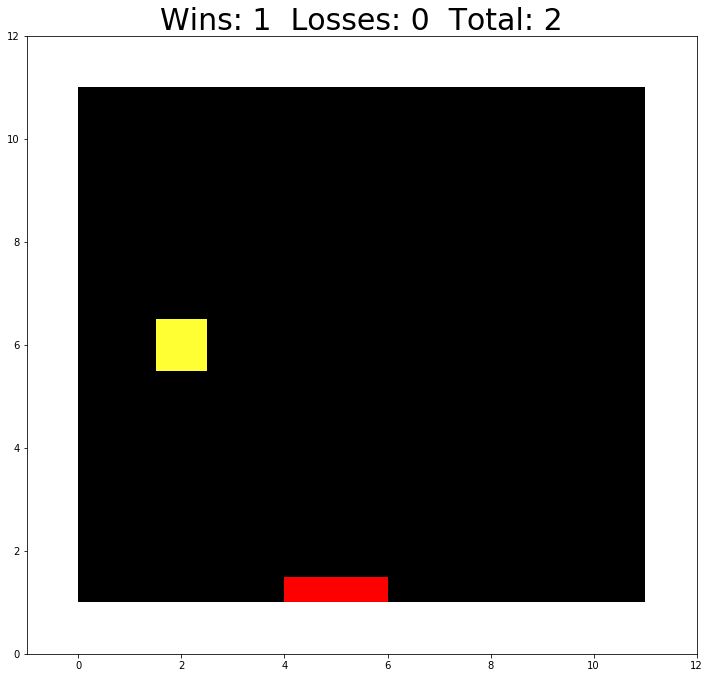

C:\Users\kissi\AppData\Local\Programs\Python\Python35\lib\site-packages\matplotlib\axis.py:1086: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "


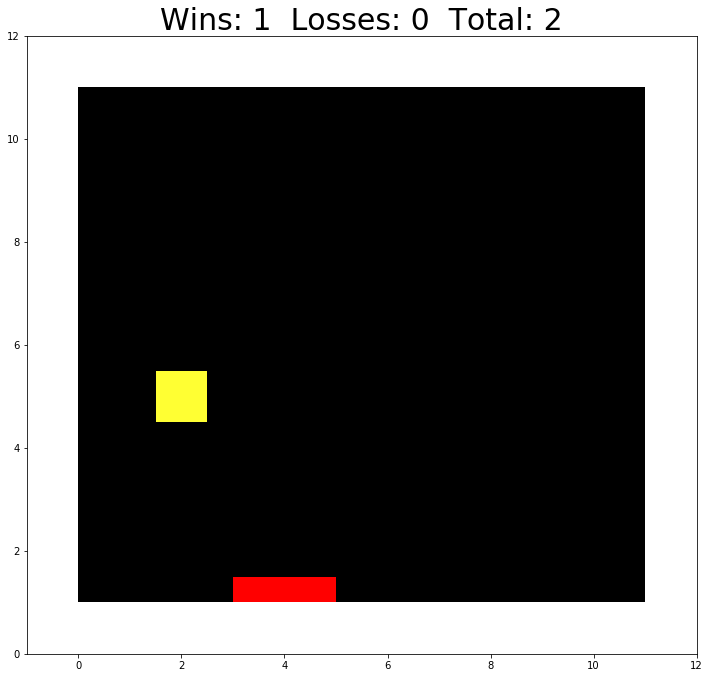

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\kissi\AppData\Local\Programs\Python\Python35\lib\site-packages\IPython\core\interactiveshell.py", line 2869, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-7a2723925b27>", line 80, in <module>
    time.sleep(0.2)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\kissi\AppData\Local\Programs\Python\Python35\lib\site-packages\IPython\core\interactiveshell.py", line 1809, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\kissi\AppData\Local\Programs\Python\Python35\lib\site-packages\IPython\core\ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_o

KeyboardInterrupt: 

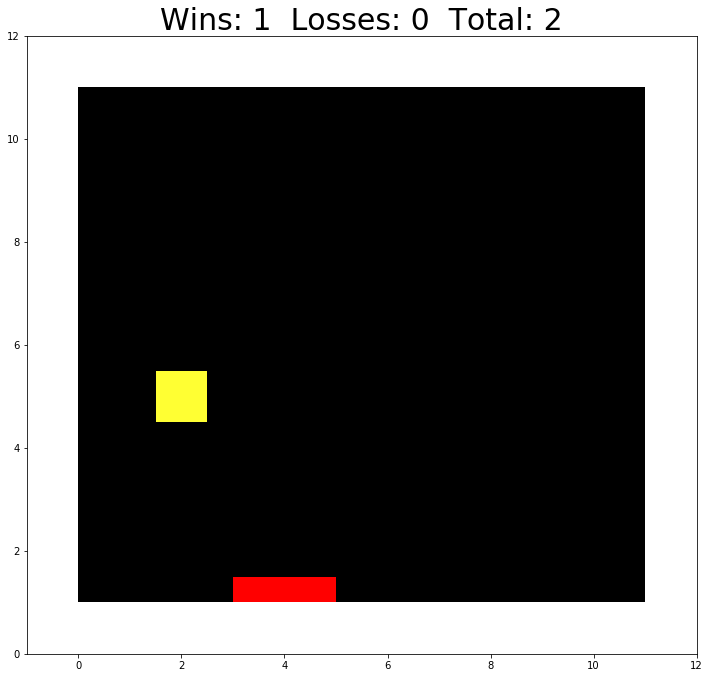

In [ ]:
gridSize = 10  # The size of the grid that the agent is going to play the game on.
maxGames = 100
env = CatchEnvironment(gridSize)
winCount = 0
loseCount = 0
numberOfGames = 0
modelSaveRoot = os.path.join(os.getcwd(), 'model')
savePath = os.path.join(modelSaveRoot, 'model.ckpt')

ground = 1
plot = pl.figure(figsize=(12, 12))
axis = plot.add_subplot(111, aspect='equal')
axis.set_xlim(-1, 12)
axis.set_ylim(0, 12)

# Add ops to save and restore all the variables.
saver = tf.train.Saver()


def drawState(fruitRow, fruitColumn, basket):
    global gridSize
    # column is the x axis
    fruitX = fruitColumn
    # Invert matrix style points to coordinates
    fruitY = (gridSize - fruitRow + 1)
    statusTitle = "Wins: " + str(winCount) + "  Losses: " + str(loseCount) + "  Total: " + str(numberOfGames)
    axis.set_title(statusTitle, fontsize=30)
    for p in [
        patches.Rectangle(
            ((ground - 1), ground), 11, 10,
            facecolor="#000000"  # Black
        ),
        patches.Rectangle(
            (basket - 1, ground), 2, 0.5,
            facecolor="#FFFF33"  # Yellow
        ),
        patches.Rectangle(
            (fruitX - 0.5, fruitY - 0.5), 1, 1,
            facecolor="#ff66be"  # Yellow FFFF33
        ),
    ]:
        axis.add_patch(p)
    display.clear_output(wait=True)
    display.display(pl.gcf())


with tf.Session() as sess:
    # Restore variables from disk.
    saver.restore(sess, savePath)
    print('saved model is loaded!')

    while numberOfGames < maxGames:
        numberOfGames = numberOfGames + 1

        # The initial state of the environment.
        isGameOver = False
        fruitRow, fruitColumn, basket = env.reset()
        currentState = env.observe()
        drawState(fruitRow, fruitColumn, basket)

        while not isGameOver:
            # Forward the current state through the network.
            q = sess.run(output_layer, feed_dict={X: currentState})
            # Find the max index (the chosen action).
            index = q.argmax()
            action = index + 1
            nextState, reward, gameOver, stateInfo = env.act(action)
            fruitRow = stateInfo[0]
            fruitColumn = stateInfo[1]
            basket = stateInfo[2]

            # Count game results
            if reward == 1:
                winCount = winCount + 1
            elif reward == -1:
                loseCount = loseCount + 1

            currentState = nextState
            isGameOver = gameOver
            drawState(fruitRow, fruitColumn, basket)
            time.sleep(0.2)

display.clear_output(wait=True)
